# Imports

In [2]:
# %pip uninstall -y pytesseract

In [34]:
# %pip install -r requirements.txt

In [97]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Lib imports

In [98]:
import matplotlib.pyplot as plt
from icecream import ic
import seaborn as sns
import pandas as pd
from ollama import Client as OllamaClient
from pydantic import BaseModel

import platform
import os

## Methods imports

In [6]:
from main_methods import (
    get_pdf_info,
    extract_and_measure_timing,
)

## PDF Extraction Methods
from extraction_methods.pymupdf4llm import get_pymupdf4llm
from extraction_methods.unstructured import (
    get_unstructured_auto,
    get_unstructured_fast,
    get_unstructured_hires,
    get_unstructured_ocr,
)

## WSL Taxonomy classes

In [100]:
from wsl_taxonomy import *

# Functions

## OS and other tools

In [7]:
def get_path_of_all_files_in_subfolders_with_extension_in_list(
    folder_path: str, extensions: list[str], ignore_folders: list[str] = []
) -> list:
    all_files = []
    for root, dirs, files in os.walk(folder_path):
        # print('root', root)
        # print('dirs', dirs)
        # print('files', files)
        if any([(os.sep + ignore_folder) in root for ignore_folder in ignore_folders]):
            continue
        # if root.__contains__(r"\outputs"):
        #     continue

        for file in files:
            for extension in extensions:
                if file.lower().endswith(extension) and not file.startswith("."):
                    all_files.append(os.path.join(root, file))
    return all_files


In [44]:
def check_if_each_parent_folders_exists_and_if_not_create_it(folder_path: str):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return folder_path

In [ ]:
def call_ollama_server(used_model, system_prompt, user_prompt):
    local_client = OllamaClient(host="http://localhost:11434")
    response = local_client.chat(
        model=used_model,
        messages=[
            {
                "role": "system",
                "content": system_prompt,
            },
            {
                "role": "user",
                "content": user_prompt,
            },
        ],
    )
    return response

In [94]:
def ask_LLM_to_choose_main_author(text_content):
    my_model = "llama3.2"
    my_system_prompt = """You are a talented, organised and detail oriented researcher.
                        You have been given a study to review and your main task is to classify some information regarding the user prompt.
                        Here you're concern is to extract the main author of the study, and his/her genra.
                        **The answer should be only the name of a single person and his/her genra.**
                     """
    ## Create user prompt in english
    my_user_prompt = f"""{text_content}"""

    response = call_ollama_server(my_model, my_system_prompt, my_user_prompt)
    return_resp = response["message"]["content"]

    return return_resp


In [96]:
ask_LLM_to_choose_main_author(all_text)

"The provided text appears to be a comprehensive outline or framework for exploring the concept of human resource sustainability, including its factors and influences. Here's a breakdown of the key elements:\n\n**Figure 1: Factors and influences in human resource sustainability - an integrated approach**\n\nThis figure suggests that human resource sustainability is influenced by various factors, including:\n\n1. Organizational culture\n\t* Leadership & Management Style\n\t* Employee Involvement & Participation\n\t* Customs & Norms\n2. Operational outcomes\n\t* Organizational Practices (e.g., Productivity & Profits, Work Arrangements, Effectiveness & Efficiency)\n3. Human Resource Sustainability\n\t* Multi-skilling & Job Redesign\n\t* Equity & Perceived Fairness\n4. External environment\n\t* Production Processes (e.g., Teamwork, TQM, JIT)\n\t* Training & Appraisal\n\t* Codes & Standards\n\t* Legislation & Trade unions\n\t* Competition & Business Cycle\n\t* Labour & Product Markets\n\n**

# Main run

In [8]:
pdf_list = get_path_of_all_files_in_subfolders_with_extension_in_list(
    "sources_pdf", [".pdf"], ["outputs"]
)
print(f"Found {len(pdf_list)} pdf files")

Found 62 pdf files


In [51]:
## Get the hash of the name of the host machine
host_name = hash(platform.node())

In [ ]:
# Create a dataframe to store the data and timing of processing the pdf files
df_pdf_processing = pd.DataFrame(
    columns=[
        "pdf_path",
        "pdf_name",
        "pages_length",
        "file_size",
        "method",
        "output_md",
        "time_processing",
        "compute_identifier",
    ]
)

In [16]:
### Define methods list to be used
methods_list = [
    get_pymupdf4llm,
    # get_unstructured_auto,
    get_unstructured_fast,
    get_unstructured_hires,
    # get_unstructured_ocr,
]

In [ ]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [ ]:
# for pdf_path in pdf_list[:3]:
for pdf_path in pdf_list:
    pdf_name = os.path.basename(pdf_path)
    ic(f"Processing {pdf_name}")
    file_info = get_pdf_info(pdf_path)
    file_length = file_info["pages"]

    file_size = os.path.getsize(pdf_path) / 1024 / 1024

    for method in methods_list:
        ic(method.__name__)  # Print the method name
        # Extract and measure the time of the method
        output = extract_and_measure_timing(
            method,
            pdf_path=pdf_path,
            # bool_write_images=False,
            # bool_embed_images=False,
        )
        # Append the data to the dataframe
        df_pdf_processing.loc[len(df_pdf_processing)] = [
            pdf_path,
            pdf_name,
            file_length,
            file_size,
            method.__name__,
            output[0],
            output[1],
            host_name,
        ]

ic| f"Processing {pdf_path}": ('Processing sources_pdf\\Documentation Ecoskills '
                               'RH\\etude-transition-écologique Secteur du commerce (pas RH).pdf')
ic| method.__name__: 'get_pymupdf4llm'
ic| method.__name__: 'get_unstructured_fast'
ic| method.__name__: 'get_unstructured_hires'
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

ic| f"Processing {pdf_path}": ('Processing sources_pdf\\Documentation Ecoskills RH\\Littérature pour les '
                               'modèles\\le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf')
ic| method.__name__: 'get_pymupdf4llm'
ic| method.__name__: 'get_unstructured_fast'
ic| method.__name__: 'get_unstructured_hires'
ic| f"Processing {pdf_path}": ('Processing sources_pdf\\Documentation Ecoskills RH\\Littérature pour les '
                               'modèles\\Littérature académique\\2000gollan038.pdf')
ic| method.__name__: 'get_pymupdf4llm'
ic| method.__name__: 'get_unstructured_fast'
ic| method.__name__: 'get_unstructured_hires'
ic| f"Processing {pdf_path}": ('Processing sources_pdf\\Documentation Ecoskills RH\\Littérature pour les '
                               'modèles\\Littérature académique\\admsci-11-00048.pdf')
ic| method.__name__: 'get_pymupdf4llm'
ic| method.__name__: 'get_unstructured_fa

PDFPageCountError: Unable to get page count.
I/O Error: Couldn't open file 'sources_pdf\Documentation Ecoskills RH\Litt<c3><a9>rature pour les mod<c3><a8>les\Litt<c3><a9>rature acad<c3><a9>mique\Human Resource Management - 2023 - Ren - Advancing the sustainability agenda through strategic human resource management .pdf': No error.


In [ ]:
df_pdf_processing.shape

(35, 6)

In [ ]:
df_pdf_processing.head(2)

,pdf_path,pdf_name,pages_length,file_size,method,output_md,time_processing,compute_identifier
0,sources_pdf\Documentation Ecoskills RH\etude-t...,etude-transition-écologique Secteur du commerc...,103,14.742152,get_unstructured_ocr,"[| |, Liberté + Egalité + Fraternité REPUBLIQU...",483.589669,-5561349462465552372
1,sources_pdf\Documentation Ecoskills RH\Littéra...,le-developpement-de-la-gestion-durable-des-res...,22,0.219145,get_unstructured_ocr,[LE DEVELOPPEMENT DE LA GESTION DURABLE DES RE...,103.648610,-5561349462465552372
2,sources_pdf\Documentation Ecoskills RH\Littéra...,2000gollan038.pdf,21,0.078189,get_unstructured_ocr,"[HUMAN RESOURCES, CAPABILITIES, AND SUSTAINABI...",77.101861,-5561349462465552372
3,sources_pdf\Documentation Ecoskills RH\etude-t...,etude-transition-écologique Secteur du commerc...,103,14.742152,get_pymupdf4llm,"[{'metadata': {'format': 'PDF 1.5', 'title': '...",26.068919,-5561349462465552372
4,sources_pdf\Documentation Ecoskills RH\etude-t...,etude-transition-écologique Secteur du commerc...,103,14.742152,get_unstructured_fast,[],0.002999,-5561349462465552372


## TODO : Store the output of each methods

In [ ]:
## Force an object to a string


In [ ]:
pymupdf4llm_output = df_pdf_processing[
    (df_pdf_processing["method"] == "get_pymupdf4llm")
    & (df_pdf_processing["pdf_name"] == "2000gollan038.pdf")
    # (df_pdf_processing["pdf_name"] == "2000gollan038.pdf")
]["output_md"].values[0]

# ["output_md"]

# get_pymupdf4llm
# get_unstructured_fast

In [83]:
pymupdf4llm_output

[{'metadata': {'format': 'PDF 1.3',
   'title': '105.PDF',
   'author': 'Administrateur',
   'subject': '',
   'keywords': '',
   'creator': 'Microsoft Word',
   'producer': 'Acrobat PDFWriter 4.05 pour Windows NT',
   'creationDate': 'D:20001031105752Z',
   'modDate': "D:20080523233534+02'00'",
   'trapped': '',
   'encryption': None,
   'file_path': 'sources_pdf\\Documentation Ecoskills RH\\Littérature pour les modèles\\Littérature académique\\2000gollan038.pdf',
   'page_count': 21,
   'page': 1},
  'toc_items': [],
  'tables': [],
  'images': [],
  'graphics': [],
  'text': '# HUMAN RESOURCES, CAPABILITIES\n\n AND SUSTAINABILITY\n\n#### Proposal Identification Number: 105\n\n# Paul J. Gollan\n\n#### London School of Economics\n\n 13A The Heights 97 Frognal Hampstead, UK NW3 6SX Telephone/Fax: +44 171 431 3351 E-mail: p.j.gollan@lse.ac.uk\n\n\n-----\n\n',
  'words': []},
 {'metadata': {'format': 'PDF 1.3',
   'title': '105.PDF',
   'author': 'Administrateur',
   'subject': '',
   'k

In [ ]:
all_text = ""
for atext in pymupdf4llm_output:
    all_text += atext["text"] + "\n\n"

In [86]:
all_text

'# HUMAN RESOURCES, CAPABILITIES\n\n AND SUSTAINABILITY\n\n#### Proposal Identification Number: 105\n\n# Paul J. Gollan\n\n#### London School of Economics\n\n 13A The Heights 97 Frognal Hampstead, UK NW3 6SX Telephone/Fax: +44 171 431 3351 E-mail: p.j.gollan@lse.ac.uk\n\n\n-----\n\n\n\n# HUMAN RESOURCES, CAPABILITIES\n\n AND SUSTAINABILITY\n\n#### Proposal Identification Number: 105\n\n London School of Economics\n\n\n-----\n\n\n\n#### HUMAN RESOURCES, CAPABILITIES AND SUSTAINABILITY\n\n Abstract\n\n This paper will outline a number of issues for organisations to consider when\n\n pursuing sustainable human resource outcomes in the workplace. Those outcomes which\n\n reinforce corporate profitability and corporate survival, and those that satisfy employee\n\n aspirations and needs in the workplace. The paper suggests that developments in human\n\n resource management (HRM) in recent years have shifted the emphasis away from human\n\n management to a new focus on resource management. It

In [88]:
### Write the output to a file
with open("o2000gollan038_pymupdf4llm.txt", "w") as text_file:
    text_file.write(all_text)

In [ ]:
## For each row, export the output to a markdown file in the outputs folder : extracted_outputs\methods_outputs
current_folder = os.getcwd()
for index, row in df_pdf_processing.iterrows():
    output_folder_name = row["pdf_name"].replace(".pdf", "")
    row_folder = os.path.join(
        current_folder, "extracted_outputs", "methods_outputs", output_folder_name
    )
    row_folder_checked = check_if_each_parent_folders_exists_and_if_not_create_it(
        row_folder
    )
    row_output_file_path = os.path.join(row_folder_checked, row["method"] + ".md")

    with open(row_output_file_path, "w") as text_file:
        ic(row["pdf_name"])
        try:
            text_file.write(str(row["output_md"]))
        except Exception as e:
            ic(e.__context__)
        #     ic(type(row["output_md"]))
        #     # ic(row["output_md"])


ic| row["pdf_name"]: 'etude-transition-écologique Secteur du commerce (pas RH).pdf'
ic| row["pdf_name"]: 'le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf'
ic| row["pdf_name"]: '2000gollan038.pdf'
ic| row["pdf_name"]: 'etude-transition-écologique Secteur du commerce (pas RH).pdf'
ic| row["pdf_name"]: 'etude-transition-écologique Secteur du commerce (pas RH).pdf'
ic| row["pdf_name"]: 'etude-transition-écologique Secteur du commerce (pas RH).pdf'
ic| row["pdf_name"]: 'le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf'
ic| row["pdf_name"]: 'le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf'
ic| row["pdf_name"]: 'le-developpement-de-la-gestion-durable-des-ressources-humaines-un-eclairage-par-les-outils-de-pilotage-des-performances.pdf'
ic| row["pdf_name"]: '2000gollan038

FileNotFoundError: [Errno 2] No such file or directory: 'e:\\_C0D3\\_RepoS\\_Perso\\__DataForGood\\2025 02 - Parse research PDFs\\extracted_outputs\\methods_outputs\\Human Resource Management - 2023 - Ren - Advancing the sustainability agenda through strategic human resource management \\get_pymupdf4llm.md'

In [ ]:
## Hash all the values from that hash column into one unique value, not a dataframe column
hash_all = hash(
    tuple(df_pdf_processing["pdf_path"]) + tuple(df_pdf_processing["method"])
)

## Exclude the column with the output_md
df_export = df_pdf_processing.drop(columns=["output_md"])
df_export.to_csv(
    os.path.join(
        "extracted_outputs", "timing_dfs", f"df_pdf_processing_{hash_all}.csv"
    ),
    index=False,
)

## Plot the timing of each methods

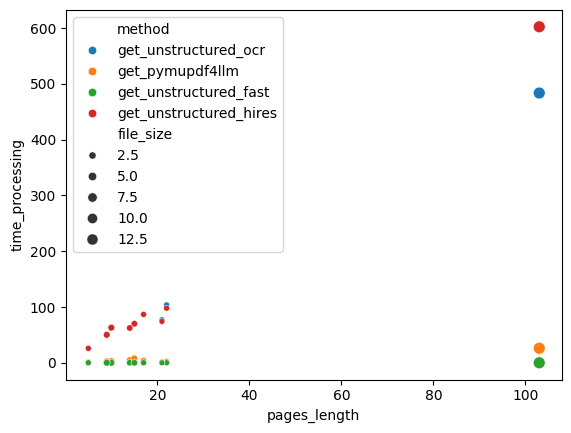

In [27]:
# Print a graph, with file_size on the x-axis and time taken to process the pdf on the y-axis, spliting the data in series by the method used to process the pdf
sns.scatterplot(
    data=df_pdf_processing,
    # x="file_size"
    x="pages_length",
    y="time_processing",
    size="file_size",
    hue="method",
)
plt.show()

# Content Analysis

In [ ]:
##TODO